In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load train and test files as dataframes

In [2]:
train_df = pd.read_csv('train.csv', header=0, parse_dates=[2],index_col=2)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 4 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2)
memory usage: 13.3 MB


In [4]:
train_df.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [5]:
train_df.tail()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2012-09-28,45,98,508.37,False
2012-10-05,45,98,628.10,False
2012-10-12,45,98,1061.02,False
2012-10-19,45,98,760.01,False
2012-10-26,45,98,1076.80,False


In [6]:
test_df = pd.read_csv('test.csv', header=0, parse_dates=[2],index_col=2)

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115064 entries, 2012-11-02 to 2013-07-26
Data columns (total 3 columns):
Store        115064 non-null int64
Dept         115064 non-null int64
IsHoliday    115064 non-null bool
dtypes: bool(1), int64(2)
memory usage: 2.7 MB


In [8]:
test_df.head()

,Store,Dept,IsHoliday
Date,,,
2012-11-02,1,1,False
2012-11-09,1,1,False
2012-11-16,1,1,False
2012-11-23,1,1,True
2012-11-30,1,1,False


### Load the features and Stores files as dataframes

In [9]:
features_df = pd.read_csv('features.csv', header=0, parse_dates=[1],index_col=1)

In [10]:
features_df.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,
2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2010-02-12,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
2010-03-05,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [11]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8190 entries, 2010-02-05 to 2013-07-26
Data columns (total 11 columns):
Store           8190 non-null int64
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1)
memory usage: 711.8 KB


In [12]:
stores_df = pd.read_csv('stores.csv')

In [13]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [14]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


### Explore the train_df dataframe

In [15]:
train_df['Store'].nunique() ## Number of unique stores

45

In [16]:
train_df['Dept'].nunique() ## Count of Depts

81

In [17]:
train_df['Store'].value_counts().head() #record count by stores

13    10474
10    10315
4     10272
1     10244
2     10238
Name: Store, dtype: int64

In [18]:
train_df['Dept'].value_counts().head()

1     6435
10    6435
38    6435
21    6435
67    6435
Name: Dept, dtype: int64

### EDA

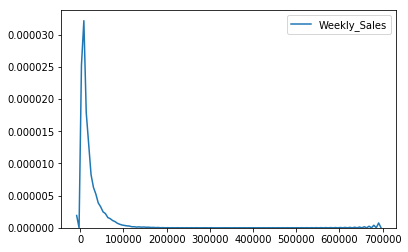

In [19]:
sns.kdeplot(train_df['Weekly_Sales'])

In [20]:
def log_transform_WeeklySales(col):
    Weekly_Sales = col[0]
    
    if Weekly_Sales <= 0:
        return 0
    else:
        return np.log(Weekly_Sales)

In [21]:
#Log transform Weekly sales
train_df['Log_WeeklySales'] = train_df[['Weekly_Sales']].apply(log_transform_WeeklySales,axis=1)

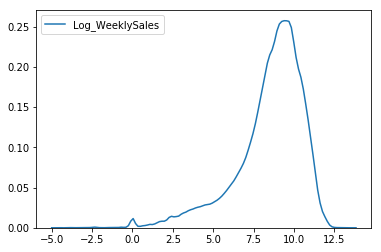

In [22]:
sns.kdeplot(train_df['Log_WeeklySales'])

In [23]:
## Plot the Weekly_Sales of the training set grouped by Store

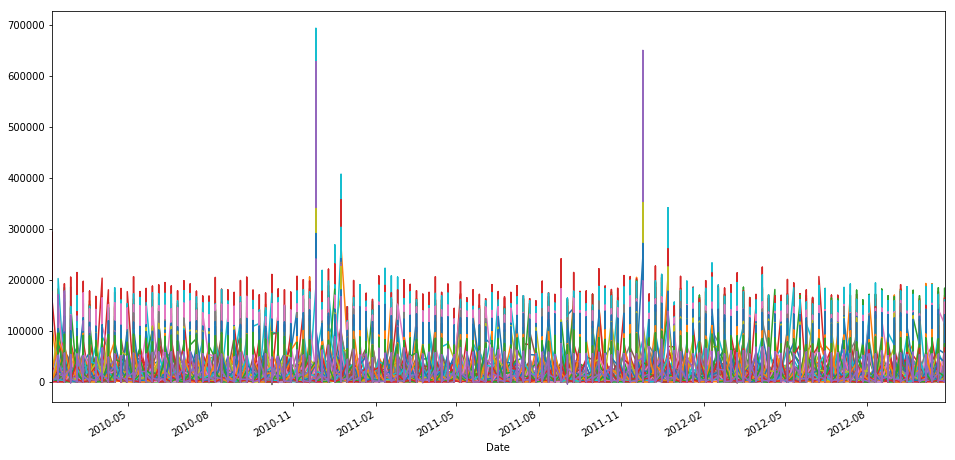

In [24]:
train_df.groupby(['Store'])['Weekly_Sales'].plot(figsize=(16,8));

In [25]:
## Plot the Weekly_Sales, without considering the store location

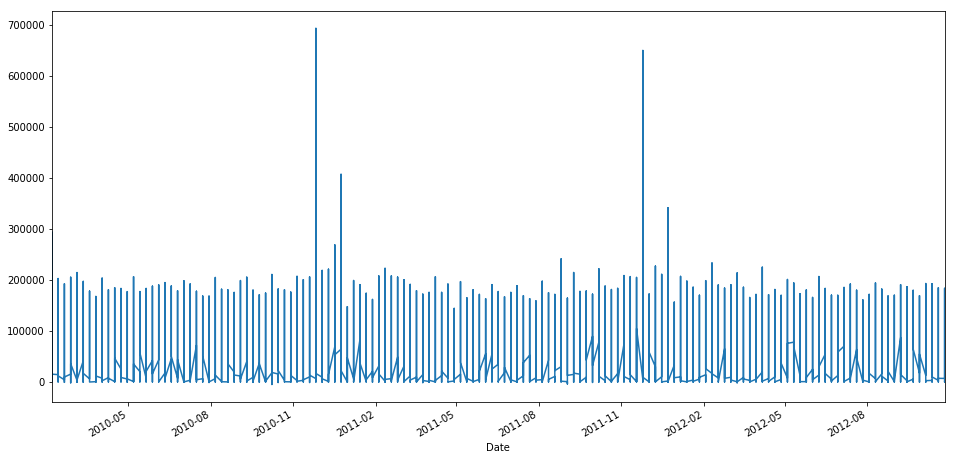

In [26]:
train_df['Weekly_Sales'].plot(figsize=(16,8))

In [27]:
## Looking at the plot above, there is clear indication of seasonality. 
## Sales in Nov, Dec seems to be high for both years plotted.

In [28]:
## This suggests that the time series is not stationary and will require differencing to make it stationary

### Create lag features

In [29]:
def create_features(df):
    df1 = pd.concat((df.shift(1), df.shift(2)
                     , df.shift(3), df.shift(1).rolling(window=3).min()
                     , df.shift(1).rolling(window=3).max(), df.shift(1).rolling(window=3).mean()
                     , df.shift(1).rolling(window=3).median(), df.shift(1).rolling(window=3).std()
                     , df.shift(6), df.shift(1).rolling(window=6).min()
                     , df.shift(1).rolling(window=6).max(), df.shift(1).rolling(window=6).mean()
                     , df.shift(1).rolling(window=6).median(), df.shift(1).rolling(window=6).std()
                     , df.shift(9), df.shift(1).rolling(window=9).min()
                     , df.shift(1).rolling(window=9).max(), df.shift(1).rolling(window=9).mean()
                     , df.shift(1).rolling(window=9).median(), df.shift(1).rolling(window=9).std())
                    ,axis=1) 
    df1.columns = ['Lag_1', 'Lag_2'
                   ,'Lag_3', 'Min_Lag_1-3', 'Max_Lag_1-3', 'Mean_Lag_1-3', 'Median_Lag_1-3', 'Std_Lag_1-3'
                   ,'Lag_6', 'Min_Lag_1-6', 'Max_Lag_1-6', 'Mean_Lag_1-6', 'Median_Lag_1-6', 'Std_Lag_1-6'
                   ,'Lag_9', 'Min_Lag_1-9', 'Max_Lag_1-9', 'Mean_Lag_1-9', 'Median_Lag_1-9', 'Std_Lag_1-9']
    return df1

In [30]:
train_new = pd.concat((train_df, train_df.groupby(['Store'])[['Weekly_Sales']].apply(create_features)),axis=1)

In [31]:
train_new.head(20)

,Store,Dept,Weekly_Sales,IsHoliday,Log_WeeklySales,Lag_1,Lag_2,Lag_3,Min_Lag_1-3,Max_Lag_1-3,...,Max_Lag_1-6,Mean_Lag_1-6,Median_Lag_1-6,Std_Lag_1-6,Lag_9,Min_Lag_1-9,Max_Lag_1-9,Mean_Lag_1-9,Median_Lag_1-9,Std_Lag_1-9
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,10.123607,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-12,1,1,46039.49,True,10.737255,24924.50,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-19,1,1,41595.55,False,10.635748,46039.49,24924.50,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-26,1,1,19403.54,False,9.873211,41595.55,46039.49,24924.50,24924.50,46039.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-05,1,1,21827.90,False,9.990944,19403.54,41595.55,46039.49,19403.54,46039.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-12,1,1,21043.39,False,9.954342,21827.90,19403.54,41595.55,19403.54,41595.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-19,1,1,22136.64,False,10.004989,21043.39,21827.90,19403.54,19403.54,21827.90,...,46039.49,29139.061667,23376.200,11595.899933,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-26,1,1,26229.21,False,10.174629,22136.64,21043.39,21827.90,21043.39,22136.64,...,46039.49,28674.418333,21982.270,11851.586348,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-02,1,1,57258.43,False,10.955330,26229.21,22136.64,21043.39,21043.39,26229.21,...,41595.55,25372.705000,21982.270,8262.275220,NaN,NaN,NaN,NaN,NaN,NaN
